<a href="https://colab.research.google.com/github/Sameeksha288/Handwritten-Digit-Classification/blob/main/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

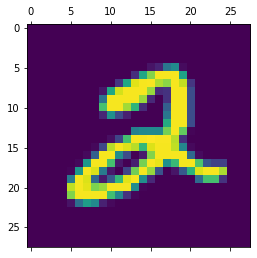

In [ ]:
plt.matshow(x_train[5])

In [ ]:
y_train[5]

2

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)
x_train_flatten.shape

(60000, 784)

In [ ]:
x_test_flatten.shape

(10000, 784)

In [ ]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4640 - accuracy: 0.8796
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3037 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2835 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2734 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2668 - accuracy: 0.9243


In [ ]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2680 - accuracy: 0.9277


[0.2680065333843231, 0.9276999831199646]

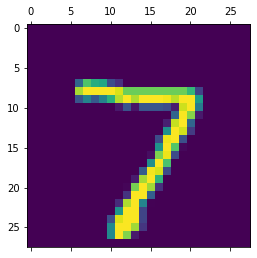

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_pred = model.predict(x_test_flatten)
y_pred[0]

array([3.5577767e-02, 3.1231718e-07, 5.9829418e-02, 9.5375746e-01,
       1.5866540e-03, 1.3046700e-01, 9.5230467e-07, 9.9981290e-01,
       1.1914436e-01, 6.3540781e-01], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

7

In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    2,    0,    4,    2,    1,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,    9,  921,   18,    7,    3,   13,    9,   42,    3],
       [   4,    0,   18,  918,    0,   27,    2,   10,   24,    7],
       [   2,    1,    4,    2,  920,    0,    9,    4,   11,   29],
       [  10,    2,    3,   27,    8,  788,   14,    4,   30,    6],
       [  16,    3,    7,    1,    7,   14,  907,    1,    2,    0],
       [   2,    5,   23,    7,    9,    0,    0,  950,    4,   28],
       [   7,    7,    5,   16,    9,   24,    9,   10,  883,    4],
       [  11,    7,    1,    9,   31,    8,    0,   21,   10,  911]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

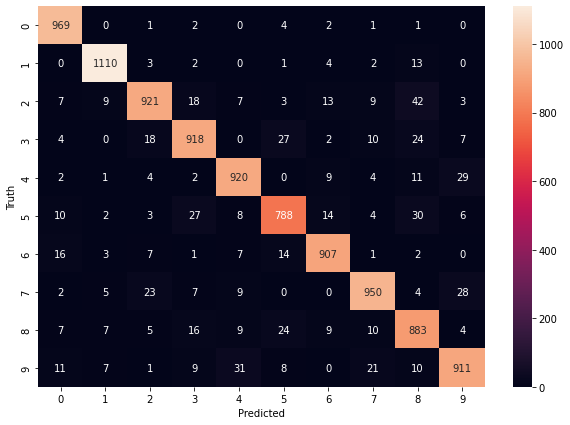

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# adding hidden layer
model = keras.Sequential([
   keras.layers.Dense(100, input_shape=(784,),activation='relu'),
   keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2710 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1196 - accuracy: 0.9654
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0844 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0648 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0511 - accuracy: 0.9842


In [ ]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0849 - accuracy: 0.9741


[0.08489683270454407, 0.9740999937057495]

Text(69.0, 0.5, 'Truth')

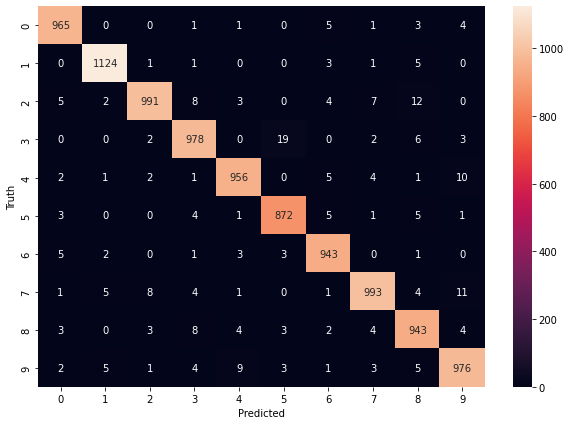

In [ ]:
y_pred = model.predict(x_test_flatten)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# flattening array through keras.Flatten
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(28,28)),
   keras.layers.Dense(100, activation='relu'),
   keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2703 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1223 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0844 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0649 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0514 - accuracy: 0.9839
